In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# Reading csv file
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Printing the number of columns in the dataset
print("Number of columns:", df.shape[1])

Number of columns: 14


In [4]:
# Printing the number of columns in the dataset
print("Number of columns:", df.shape[1])

Number of columns: 14


In [5]:
# Printing the first 5 rows of the data.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Printing the datatype, count of non-null rows and datatype of every column in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Gives the statistical details of of every column in the data.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Checking if there is any null values in the dataset.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

In [9]:
# Count of patients having heart disease
heart_diesase_count = df.target.value_counts()[1]

In [10]:
heart_diesase_count

165

In [11]:
# Count of patients not having heart disease
no_heart_diesase_count = df.target.value_counts()[0]

In [12]:
no_heart_diesase_count

138

Text(0.5, 1.0, 'Count of people with and without heart disease')

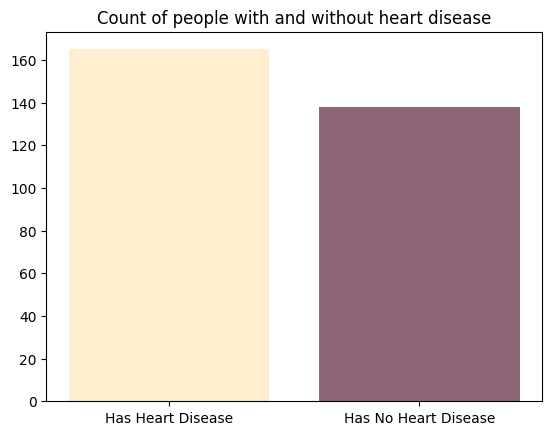

In [13]:
# Plotting the barchart of how many people has heart disease and does not have heart disease
key = np.array(["Has Heart Disease", "Has No Heart Disease"])
# 1 - Has Heart Disease and 0 - Has no Heart Disease
values = np.array([heart_diesase_count, no_heart_diesase_count])
plt.bar(key, values, color = ["#ffeed0", "#8c6677"])
plt.title('Count of people with and without heart disease')

The dataset has more or less equal number of rows with people having and without having heart disease. Therefore, this dataset is essentially a balanced dataset.

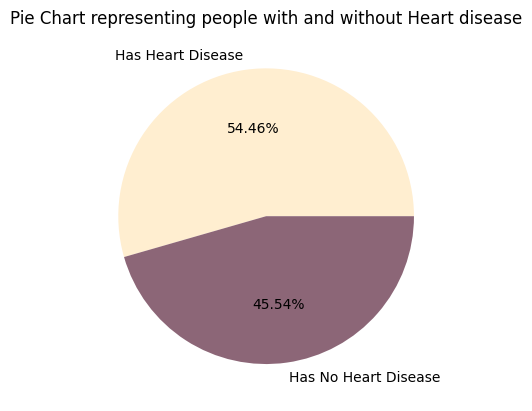

In [14]:
# Pie Chart depicting people with and without heart disease
plt.pie(values, labels = ['Has Heart Disease', 'Has No Heart Disease'], autopct='%1.2f%%',colors = ["#ffeed0", "#8c6677"])
plt.title('Pie Chart representing people with and without Heart disease')
plt.show()

Text(0.5, 1.0, 'Number of Male and Female in the dataset')

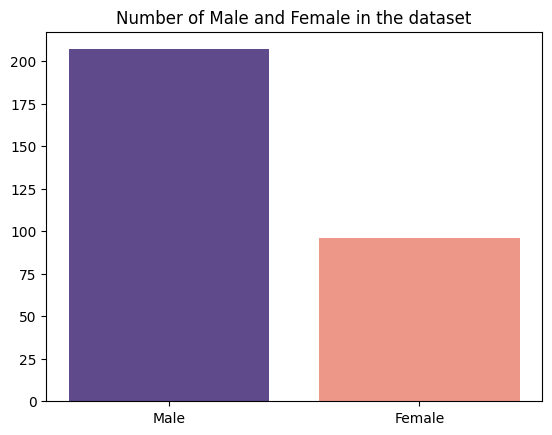

In [15]:
# Plotting the bar chart of how many male and female patients are present in the dataset.
# 1 - Male and 0 - Female
key = np.array(["Male", "Female"])
values = np.array([df.sex.value_counts()[1], df.sex.value_counts()[0]])
plt.bar(key, values, color = ["#5f4b8b", "#ec9787"])
plt.title('Number of Male and Female in the dataset')

[Text(0.5, 1.0, 'Count of Heart patients grouped by Gender')]

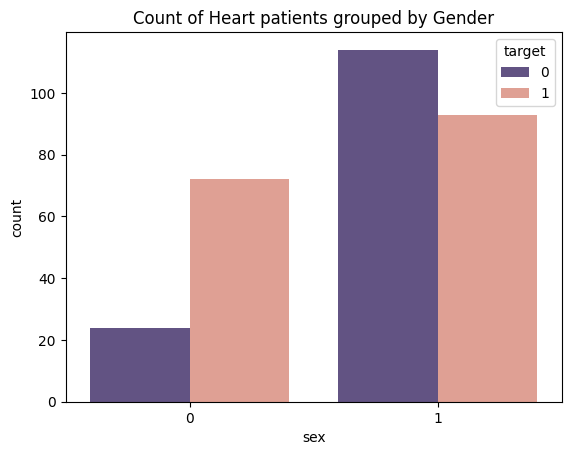

In [16]:
sns.countplot(data= df, x='sex',hue='target', palette=["#5f4b8b", "#ec9787"]).set(title='Count of Heart patients grouped by Gender')

Text(0, 0.5, 'Count')

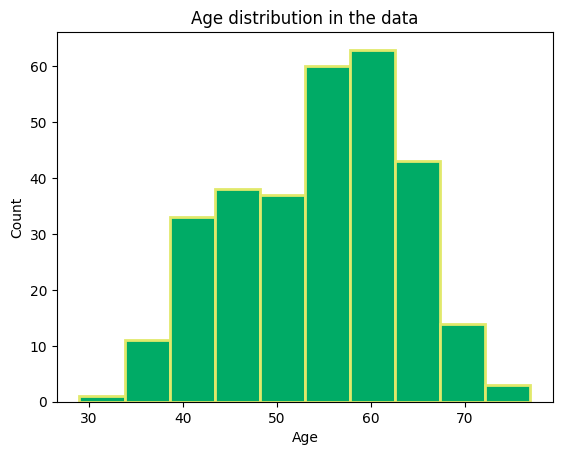

In [17]:
# Representation of people having heart disease based on age-wise category
plt.hist(df['age'], color = "#00ab66", ec="#e1e96b", lw=2)
plt.title('Age distribution in the data')
plt.xlabel('Age')
plt.ylabel('Count')

##### The above histogram shows that the age in the dataset is almost normally distributed

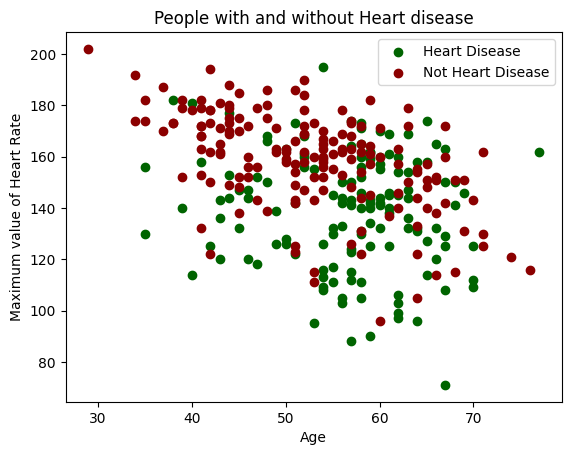

In [18]:
# Scatter plot of people with and without heart disease based on Age vs Maximum value of Heart Rate
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="darkgreen")
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="darkred")
plt.xlabel("Age")
plt.ylabel("Maximum value of Heart Rate")
plt.legend(["Heart Disease", "Not Heart Disease"])
plt.title('People with and without Heart disease')
plt.show()

[Text(0.5, 1.0, 'Chestpain count with respect to target')]

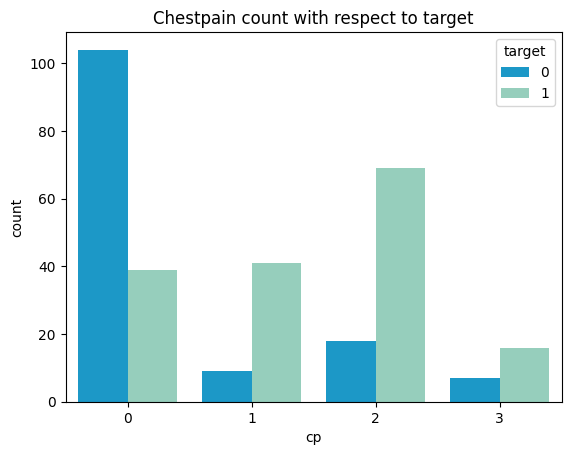

In [19]:
sns.countplot(data= df, x='cp', hue='target', palette=["#00A5E3", "#8DD7BF"]).set(title = "Chestpain count with respect to target")

Text(0.5, 0.98, 'Pie Chart for Chest Pain Type ')

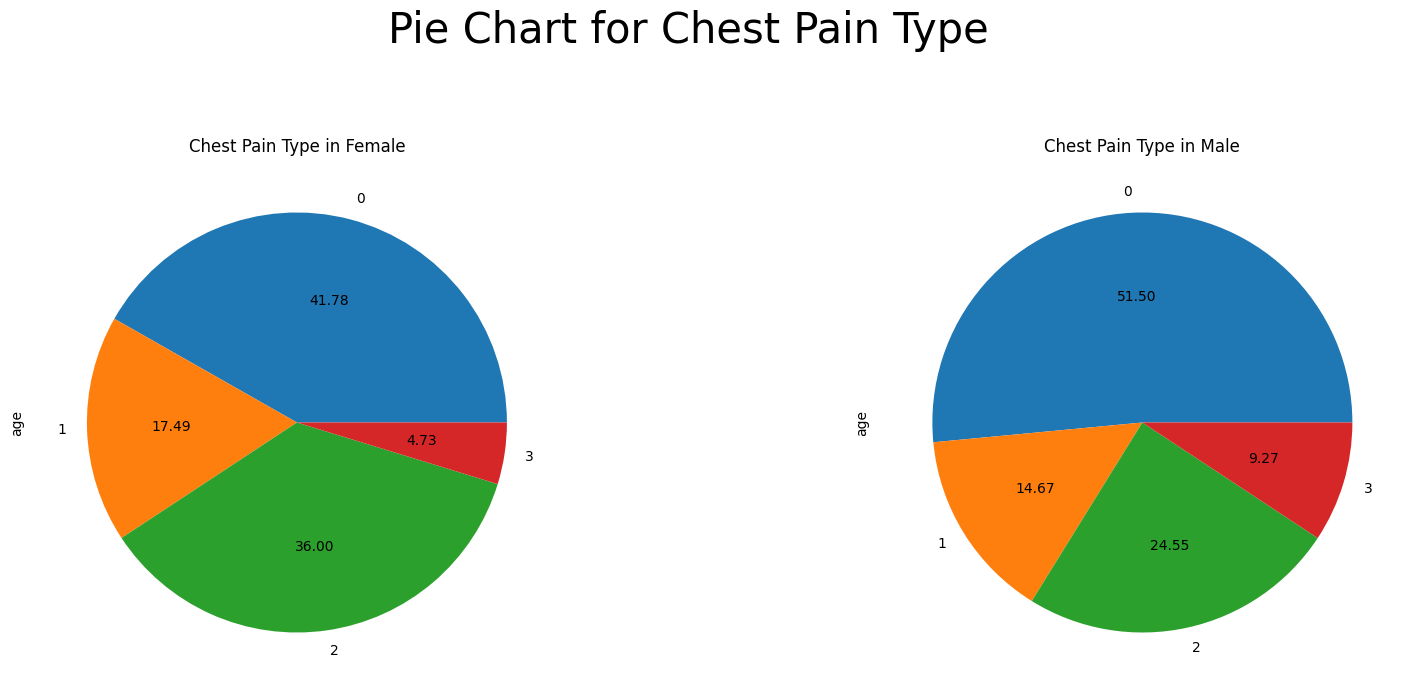

In [20]:
# Representation of people with Chest Pain Type with respect to gender
grid = GridSpec(2, 2)

plt.figure(1, figsize=(20,15))

male_df = df[df['sex'] == 1]
female_df = df[df['sex'] == 0]

plt.subplot(grid[0, 0], aspect=1, title='Chest Pain Type in Female')
female_df.age.groupby(female_df.cp).sum().plot(kind='pie',autopct='%.2f')

plt.subplot(grid[0, 1], aspect=1, title='Chest Pain Type in Male')
male_df.age.groupby(male_df.cp).sum().plot(kind='pie',autopct='%.2f')

plt.suptitle('Pie Chart for Chest Pain Type ', fontsize=30)

In the chest pain (cp) column in dataset each of the following values represents:
#### Value 0: asymptomatic
#### Value 1: atypical angina
#### Value 2: non-anginal pain
#### Value 3: typical angina

Text(0.5, 1.0, 'Representation of Fasting Blood Sugar')

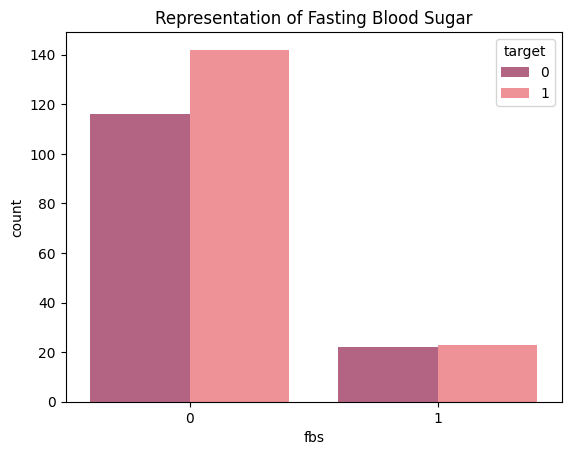

In [21]:
# Classifying count of fasting blood sugar > 120mg/dl whether true or false 
sns.countplot(x="fbs", hue="target", data=df, palette=["#C05780", "#FF828B"]) 
plt.title('Representation of Fasting Blood Sugar')

##### The barchart indicates that the fasting blood sugar with value >120 and <=120, both of these categories have almost same number of heart disease patients count, so the fasting blood sugar value is not advisable to consider as a feature for model.

Text(0.5, 1.0, 'Representation of Cholestrol levels')

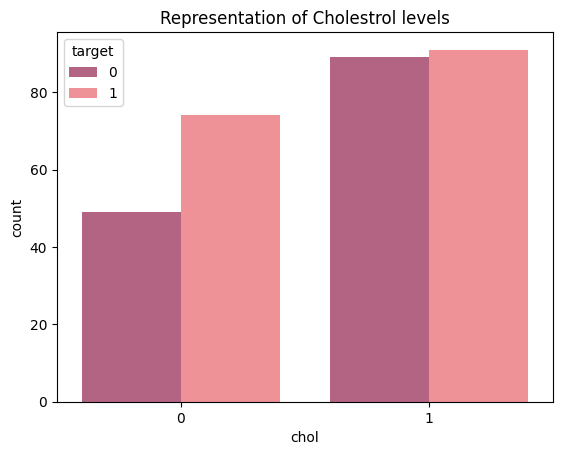

In [22]:
temp_df = df.copy()
temp_df.loc[temp_df['chol'] <= 230, 'chol'] = 0
temp_df.loc[temp_df['chol'] > 230, 'chol'] = 1
temp_df
sns.countplot(x="chol", hue="target", data=temp_df, palette=["#C05780", "#FF828B"]) 
plt.title('Representation of Cholestrol levels')

##### The graph denotes that the number of people having heart disease has the same number of patients having and without having high cholestrol value. Here since in this dataset, the cholestrol value is mg/dl, value above 230 is considered high. So, this is not a essential feature for heart disease prediction according to this dataset.

Text(0.5, 1.0, 'thal count with respect to target')

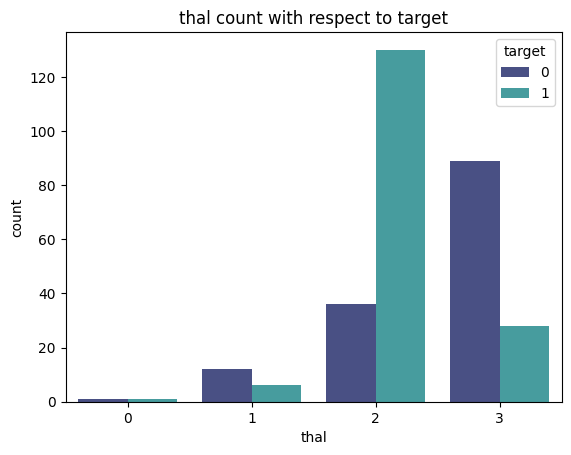

In [23]:
# Representation of thal attribute
sns.countplot(x="thal", hue="target", data=df, palette="mako")
plt.title("thal count with respect to target")

Text(0.5, 1.0, 'exang with respect to target')

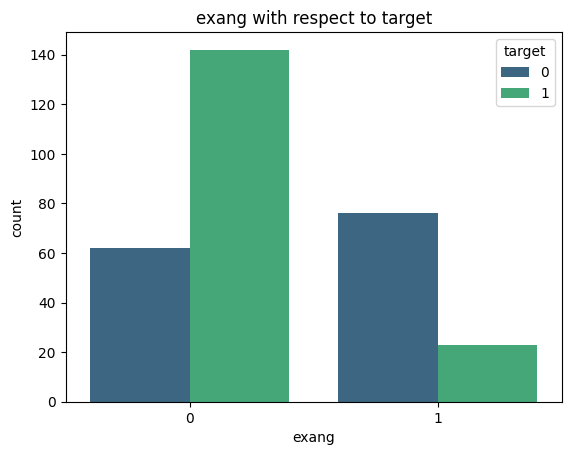

In [24]:
# Representation of exang count with respect to target
sns.countplot(x="exang", hue="target", data=df, palette = "viridis")
plt.title("exang with respect to target")

Text(0.5, 1.0, 'Representation of ca count with respect to target')

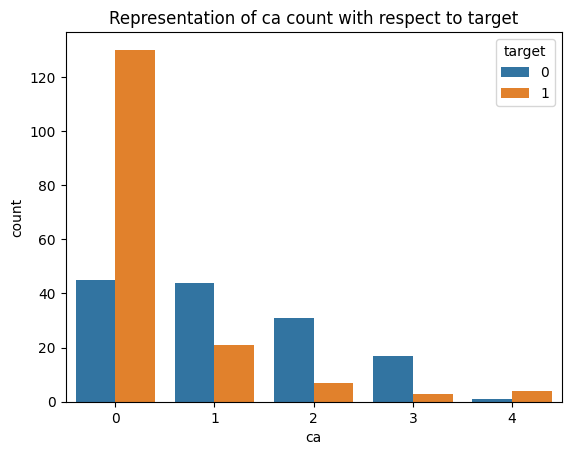

In [25]:
# Representation of ca count in Male and Female
sns.countplot(x="ca", hue="target", data=df)
plt.title("Representation of ca count with respect to target")

Text(0.5, 1.0, 'Representation of restecg count with respect to target')

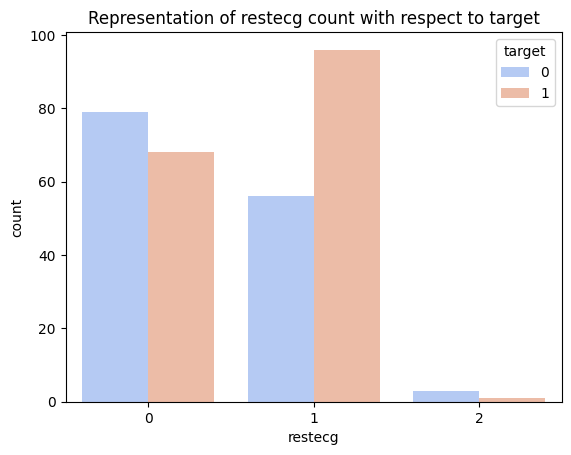

In [26]:
# Representation of restecg count
sns.countplot(x="restecg", hue="target", data=df, palette="coolwarm")
plt.title("Representation of restecg count with respect to target")

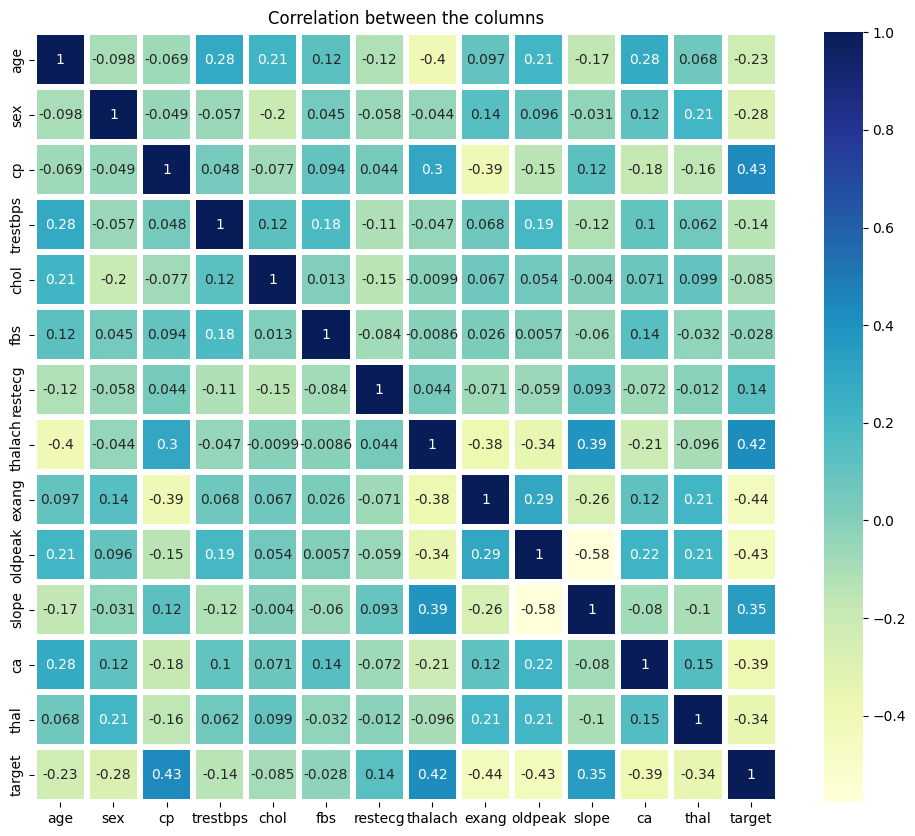

In [27]:
# Printing the correlation between every columns in the data.
corr = df.corr()
plt.figure(figsize=(12,10)) 
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths = 3)
plt.title("Correlation between the columns")
plt.show()


The above correlation shows that the columns fbs (fasting blood sugar) and chol (cholosterol) has very weak correlation with respect to the target variable. So the columns fbs and chol can be neglected as features for prediction.

In [28]:
# Dropping the chol and fbs columns from the dataset.
df1 = df.drop(columns=["chol", "fbs"])
X = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [29]:
X = df1.drop("target", axis=1)
y = df1.target.values

In [30]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [31]:
x_train.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,1,162,0,0.0,2,0,2
202,58,1,0,150,0,111,1,0.8,2,0,3
196,46,1,2,150,1,147,0,3.6,1,0,2
75,55,0,1,135,0,161,0,1.4,1,0,2
176,60,1,0,117,1,160,1,1.4,2,2,3


In [32]:
# Function to print the accuracy and score values
def print_report(y_test, y_pred):
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    print("Precision Score: ", precision_score)
    print("Recall Score: ", recall_score)
    print("F1 score: ", f1_score)

In [33]:
# Using the dictionary to store accuracy values of each model
scores_dict = {}

### Logistic Regression

In [34]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, max_iter=20000) 

# Fitting into the logistic regression model
lr.fit(x_train, y_train) 

y_pred_lr = lr.predict(x_test) 

print_report(y_test, y_pred_lr) 

Precision Score:  0.8787878787878788
Recall Score:  0.90625
F1 score:  0.8923076923076922


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression Model')

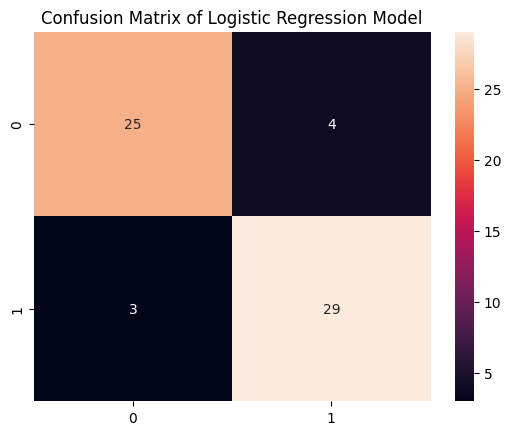

In [35]:
# Confusion matrix of logistic regression model
matrix= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")
plt.title("Confusion Matrix of Logistic Regression Model")

In [36]:
scores_dict['Logistic Regression'] = lr.score(x_test, y_test)

In [37]:
scores_dict['Logistic Regression']

0.8852459016393442

### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fitting the decision tree model
decision_tree.fit(x_train, y_train)

y_pred_dt = decision_tree.predict(x_test) 

print_report(y_test, y_pred_dt) 

Precision Score:  0.8387096774193549
Recall Score:  0.8125
F1 score:  0.8253968253968254


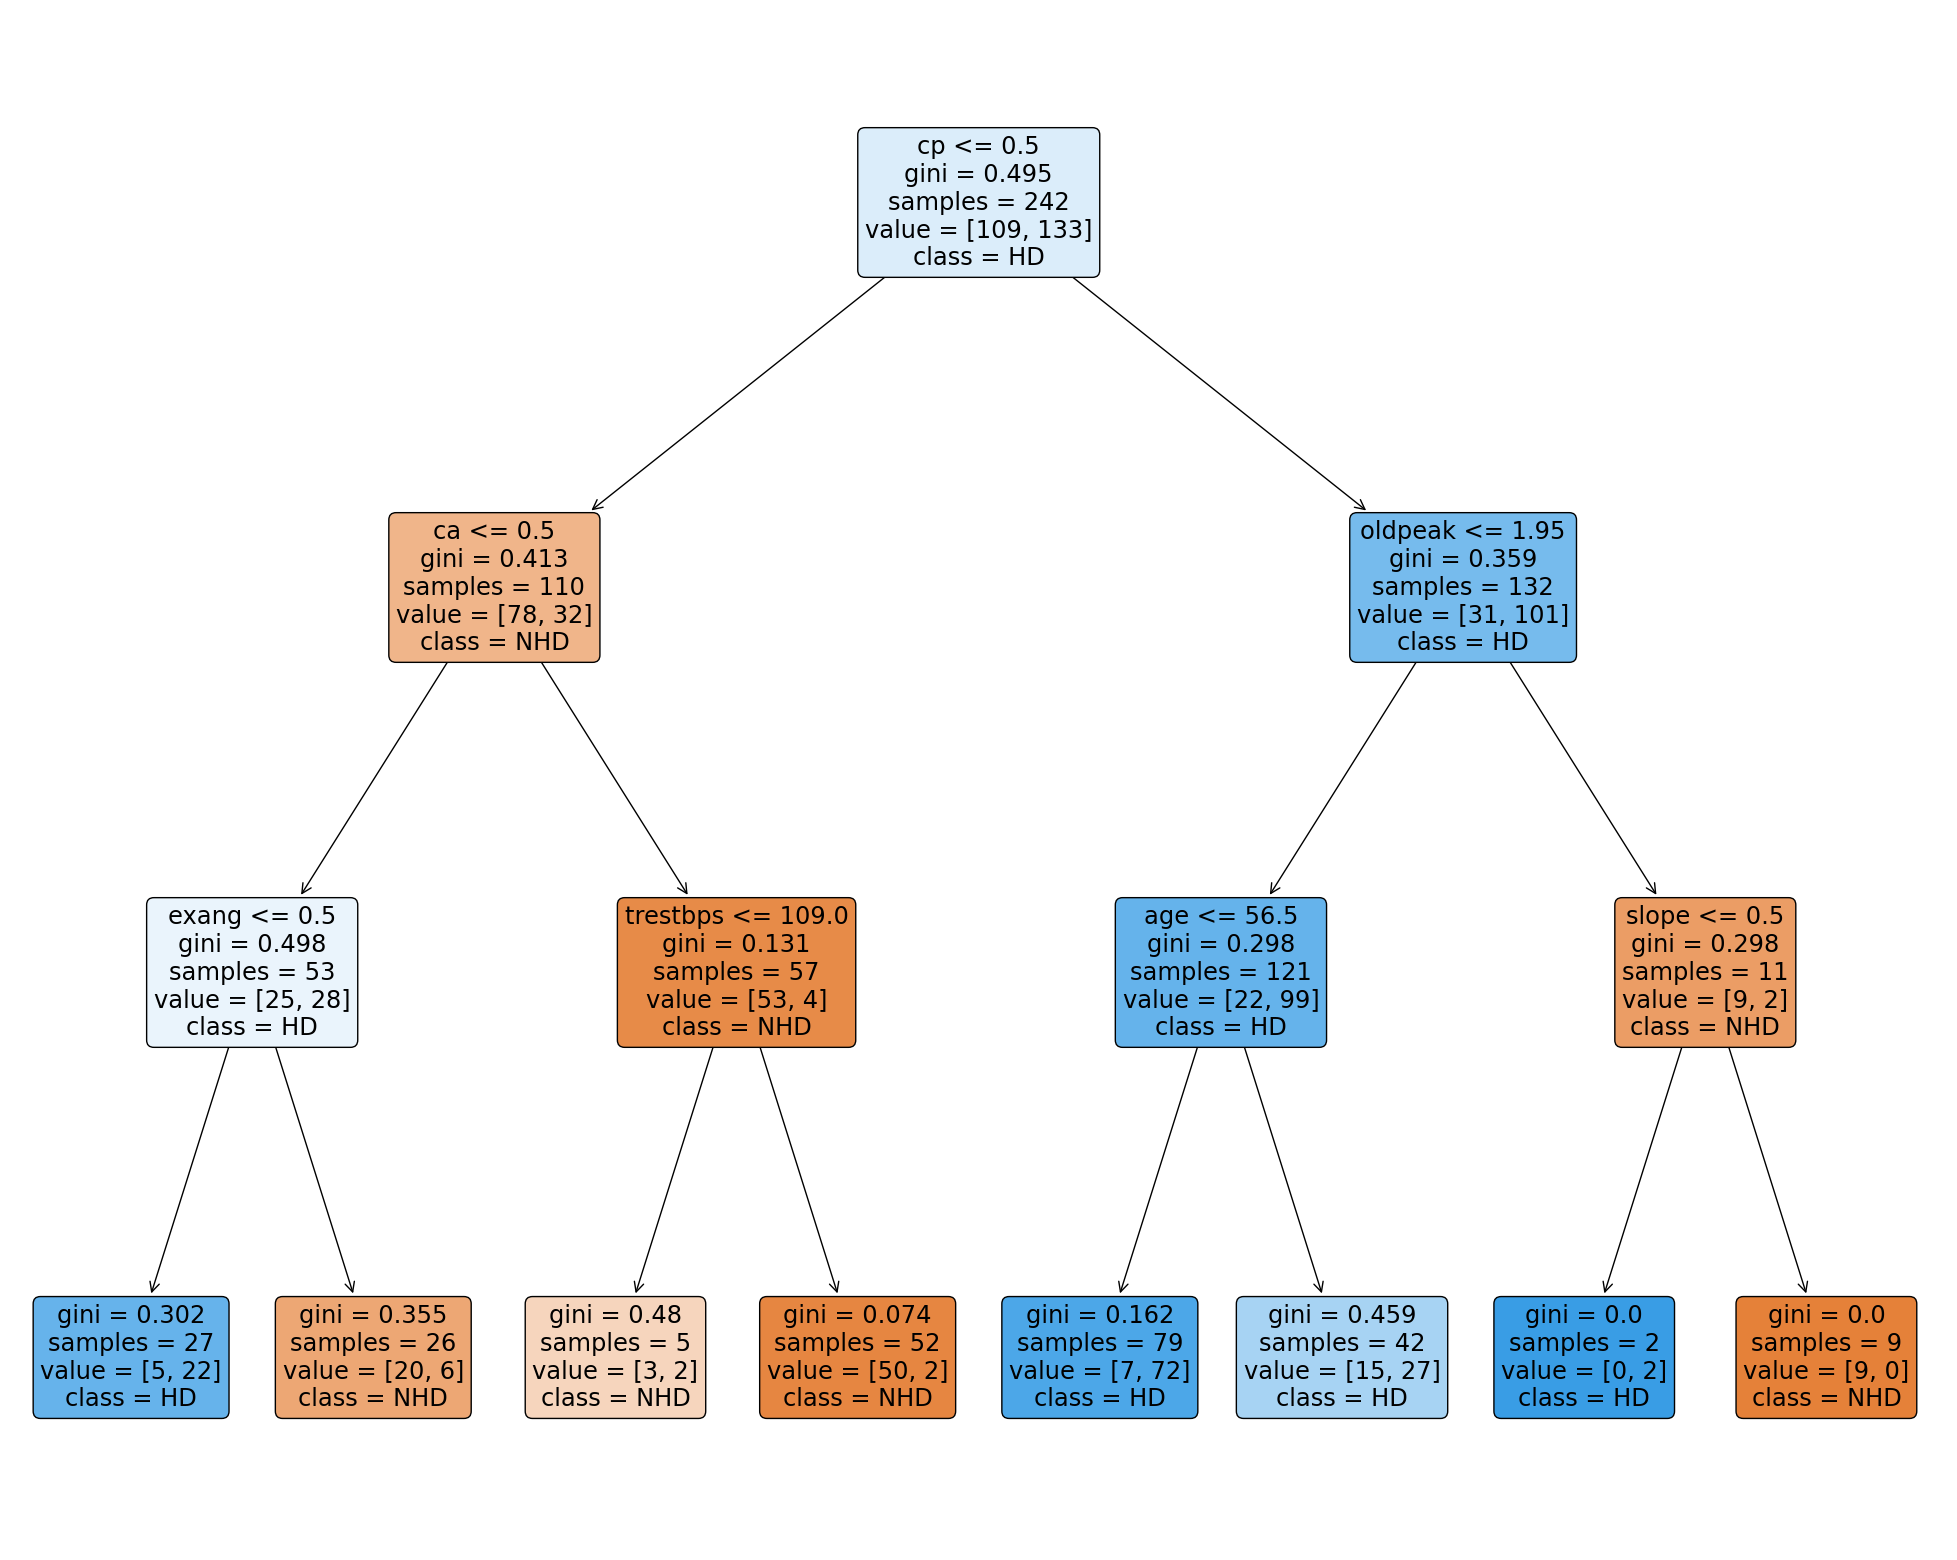

In [39]:
from sklearn import tree

# Declaring the set of feature names.
feature_names = ['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']
# Declaring the set of feature names.
target_names = ["NHD", "HD"]
fig = plt.figure(figsize=(25,20))
# Visualizing the decision tree
plot = tree.plot_tree(decision_tree, 
               feature_names=feature_names,
               class_names=target_names,
               filled=True, rounded=True) 

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

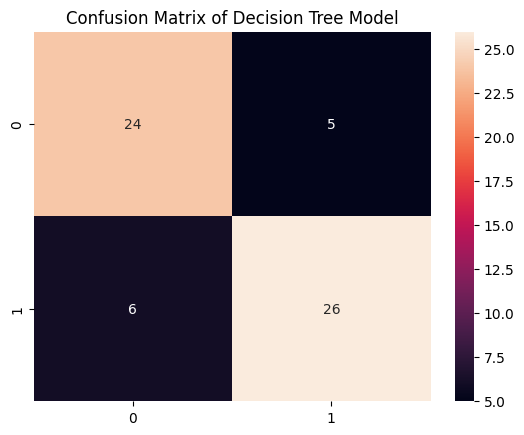

In [40]:
# Printing the confusion matrix of decision tree model
matrix= confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")
plt.title("Confusion Matrix of Decision Tree Model")

In [41]:
scores_dict['Decision Tree'] = decision_tree.score(x_test, y_test)

In [42]:
scores_dict['Decision Tree']

0.819672131147541

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# Fitting the random forest model
random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test) 

print_report(y_test, y_pred_rf) 

Precision Score:  0.84375
Recall Score:  0.84375
F1 score:  0.84375


Text(0.5, 1.0, 'Confusion Matrix of Random Forest Model')

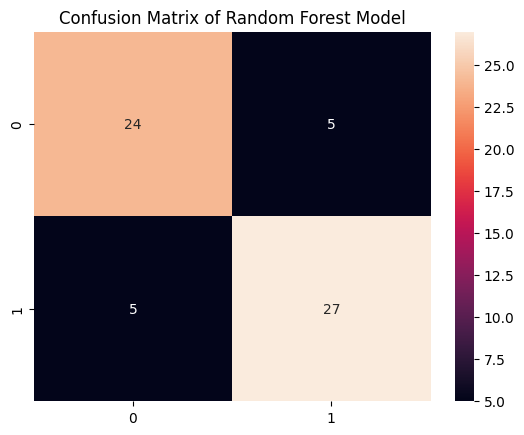

In [101]:
# Printing the confusion matrix of random forest model
matrix= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")
plt.title("Confusion Matrix of Random Forest Model")

In [102]:
scores_dict['Random Forest'] = random_forest.score(x_test, y_test)

In [103]:
scores_dict['Random Forest']

0.8360655737704918

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Fitting the KNN model
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test) 

print_report(y_test, y_pred_knn) 

Precision Score:  0.6363636363636364
Recall Score:  0.65625
F1 score:  0.6461538461538462


Text(0.5, 1.0, 'Confusion Matrix of KNN Model')

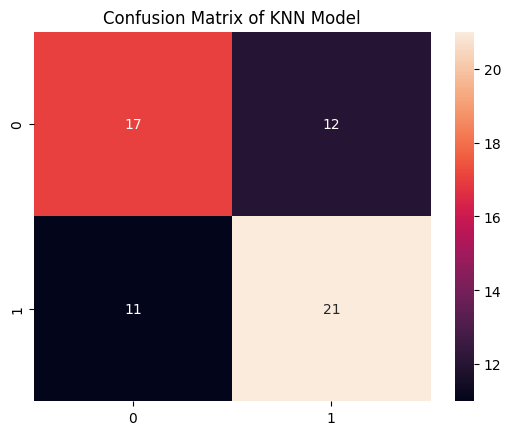

In [105]:
# Printing the confusion matrix of KNN model
matrix= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")
plt.title("Confusion Matrix of KNN Model")

In [106]:
scores_dict['KNN'] = knn.score(x_test, y_test)

In [107]:
scores_dict['KNN']

0.6229508196721312

### Support Vector Classifier

In [51]:
from sklearn.svm import SVC

svc = SVC()

# Fitting the SVC model
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test) 

print_report(y_test, y_pred_svc) 

Precision Score:  0.7297297297297297
Recall Score:  0.84375
F1 score:  0.7826086956521738


Text(0.5, 1.0, 'Confusion Matrix of SVC Model')

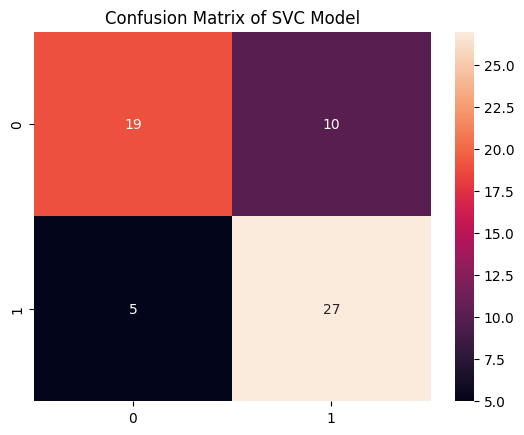

In [52]:
# Printing the confusion matrix of SVC model
matrix= confusion_matrix(y_test, y_pred_svc)
sns.heatmap(matrix,annot = True, fmt = "d")
plt.title("Confusion Matrix of SVC Model")

In [53]:
scores_dict['SVC'] = svc.score(x_test, y_test)

In [54]:
scores_dict['SVC']

0.7540983606557377

#### Comparison of models

In [108]:
scores_dict

OrderedDict([('Decision Tree', 81.9672131147541),
             ('KNN', 0.6229508196721312),
             ('Logistic Regression', 88.52459016393442),
             ('Random Forest', 0.8360655737704918),
             ('SVC', 75.40983606557377)])

In [56]:
for key, value in scores_dict.items():
    scores_dict[key] = scores_dict[key] * 100

In [57]:
from collections import OrderedDict
scores_dict = OrderedDict(sorted(scores_dict.items()))

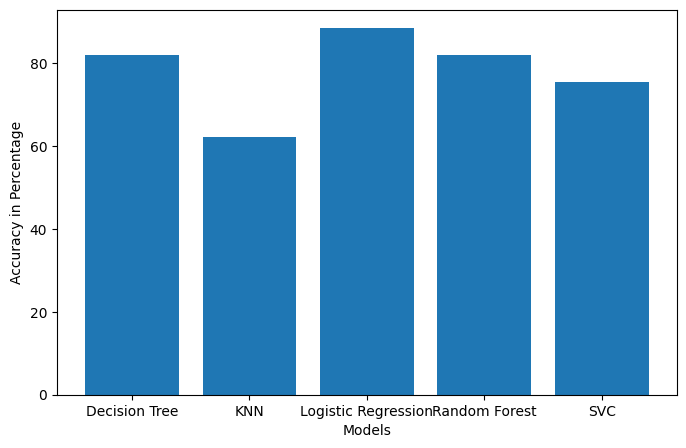

In [58]:
labels = scores_dict.keys()
fig = plt.figure(figsize=(8, 5))
plt.bar(range(len(scores_dict)), scores_dict.values())
plt.xticks(range(len(labels)), list(labels))
plt.xlabel("Models")
plt.ylabel("Accuracy in Percentage")
plt.show()

### Tuning KNN

In [59]:
knn_train_scores = []
knn_test_scores = []

knn = KNeighborsClassifier()

# Iterating from 1 to 15 to find the best neighbour value that can be used to the model to gain the best accuracy
for x in range(1,16):
    knn.set_params(n_neighbors = x)
    knn.fit(x_train, y_train)
    knn_train_scores.append(knn.score(x_train, y_train)*100)
    knn_test_scores.append(knn.score(x_test, y_test)*100)

In [60]:
knn_test_scores

[62.295081967213115,
 62.295081967213115,
 67.21311475409836,
 62.295081967213115,
 62.295081967213115,
 63.934426229508205,
 60.65573770491803,
 65.57377049180327,
 65.57377049180327,
 67.21311475409836,
 70.49180327868852,
 65.57377049180327,
 72.1311475409836,
 72.1311475409836,
 70.49180327868852]

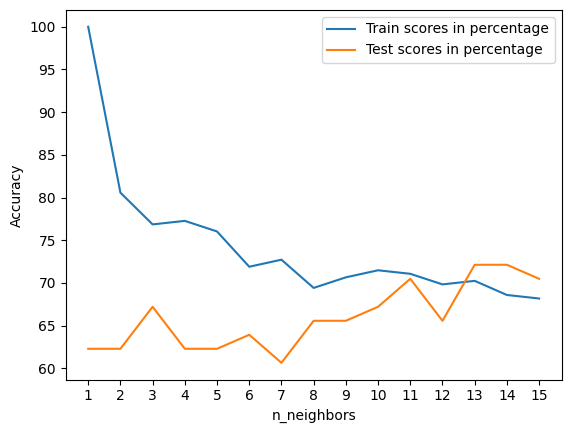

In [61]:
plt.plot(range(1,16), knn_train_scores, label="Train scores in percentage")
plt.plot(range(1,16), knn_test_scores, label="Test scores in percentage")
plt.xticks(np.arange(1, 16, 1))
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above graph, we can infer that the best value of n_neighbours is 11

### Again performing KNN with tweaked parameters

In [62]:
new_scores_dict = {}

In [63]:
knn = KNeighborsClassifier(n_neighbors = 11)

# Fitting the KNN model with tweaked parameters
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test) 

print_report(y_test, y_pred_knn) 

Precision Score:  0.6944444444444444
Recall Score:  0.78125
F1 score:  0.7352941176470588


Text(0.5, 1.0, 'Confusion Matrix of KNN Model')

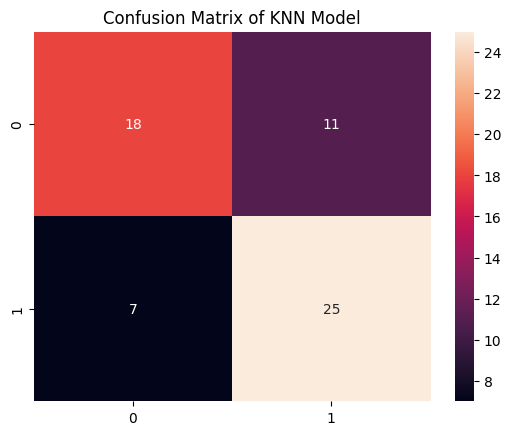

In [64]:
# Printing the confusion matrix of KNN model
matrix= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")
plt.title("Confusion Matrix of KNN Model")

In [65]:
new_scores_dict['KNN'] = knn.score(x_test, y_test)

In [66]:
new_scores_dict['KNN']

0.7049180327868853

### Tuning Logistic Regression

##### Defining hyperparameter grids for logistic regression

In [67]:
logistic_regression_grid = {"C":np.logspace(-4, 4, 20), "solver" : ["liblinear", "lbfgs"]}

In [68]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
randomized_search_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=20000),
                                param_distributions=logistic_regression_grid,
                                cv=5,
                                n_iter=40,
                                verbose=True)
randomized_search_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=20000),
                   n_iter=40,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [69]:
randomized_search_log_reg.best_params_

{'solver': 'lbfgs', 'C': 0.23357214690901212}

In [70]:
new_scores_dict['Logistic Regression'] =  randomized_search_log_reg.score(x_test, y_test)

In [71]:
new_scores_dict['Logistic Regression']

0.8852459016393442

### Tuning Random Forest

##### Defining hyperparameter grids for random forest

In [72]:
 np.arange(10, 500, 100)

array([ 10, 110, 210, 310, 410])

In [73]:
random_forest_grid = {"n_estimators": np.arange(10, 500, 100),
           "max_depth": [None, 5, 10, 15],
           "min_samples_split": np.arange(5, 20, 2),
           "min_samples_leaf": np.arange(5, 20, 2)}

In [74]:
np.random.seed(42)
randomized_search_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=random_forest_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
randomized_search_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410])},
                   verbose=True)

In [75]:
randomized_search_random_forest.best_params_

{'n_estimators': 110,
 'min_samples_split': 7,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [76]:
new_scores_dict['Random Forest'] = randomized_search_random_forest.score(x_test, y_test)

In [77]:
new_scores_dict['Random Forest']

0.8688524590163934

### Tuning Decision Tree

##### Defining hyperparameter grids for Decision tree

In [78]:
from scipy.stats import randint
decision_tree_grid = {"max_depth": [3, None],
              "max_features": randint(1, 4),
              "min_samples_leaf": randint(1, 4),
              "criterion": ["gini", "entropy"]}

In [79]:
np.random.seed(42)
randomized_search_decision_tree = RandomizedSearchCV(DecisionTreeClassifier(),
                                param_distributions=decision_tree_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)
randomized_search_decision_tree.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018C2BB0BC10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018C2BB0BDC0>},
                   verbose=True)

In [80]:
randomized_search_decision_tree.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 3}

In [81]:
new_scores_dict['Decision Tree'] = randomized_search_decision_tree.score(x_test, y_test)

In [82]:
new_scores_dict['Decision Tree']

0.8360655737704918

### Tuning Support Vector Classifier

##### Defining hyperparameter grids for Decision tree

In [83]:
from scipy.stats import uniform
svc_grid = {'C': uniform(0, 10),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [84]:
np.random.seed(42)
randomized_search_svc = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
randomized_search_svc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000018C13E7B700>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=True)

In [85]:
randomized_search_svc.best_params_

{'C': 4.319450186421157, 'kernel': 'linear'}

In [86]:
new_scores_dict['SVC'] = randomized_search_svc.score(x_test, y_test)

In [87]:
new_scores_dict['SVC'] 

0.8688524590163934

In [88]:
new_scores_dict

{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8688524590163934,
 'Decision Tree': 0.8360655737704918,
 'SVC': 0.8688524590163934}

In [89]:
for key, value in new_scores_dict.items():
    new_scores_dict[key] = new_scores_dict[key] * 100

In [90]:
new_scores_dict = OrderedDict(sorted(new_scores_dict.items()))

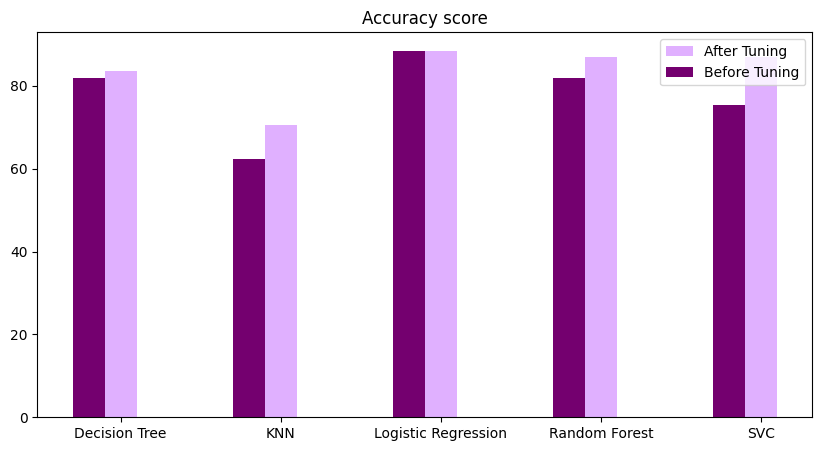

In [91]:
X = np.arange(len(new_scores_dict))
plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.bar(X, new_scores_dict.values(), width=0.2, color='#E0B0FF', align='center')
ax.bar(X-0.2, scores_dict.values(), width=0.2, color='#74006F', align='center')
ax.legend(('After Tuning','Before Tuning'))
plt.xticks(X, new_scores_dict.keys())
plt.title("Accuracy score")
plt.show()